In [1]:
%load_ext autoreload
%autoreload 2
from HPA_CC.data.dataset import RefClsPseudo
from pathlib import Path
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("/data/ishang/FUCCI-dataset-well/")
# name = "minimal_512"
name = "minimal"
hpa = True
ds = RefClsPseudo(data_dir, name, hpa=hpa, label="phase", scope=True)
X, Y = ds[:]
X, Y = X.numpy(), Y.numpy()
Y_phase = np.argmax(Y, axis=1)

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_dino_hpa.pt
X shape: torch.Size([31737, 1536])
Loading /data/ishang/FUCCI-dataset-well/minimal_sample_phase_scope.pt
Y shape: torch.Size([31737, 4])
Y shape: torch.Size([31737, 4])


[0.29906568 0.17215161 0.09193952 0.080822   0.07545605 0.04882504
 0.0261929  0.02162186 0.01884571 0.01266077 0.01231975 0.0106608
 0.00927166 0.00856478 0.00824866 0.00763736 0.00572657 0.00522535
 0.00429632 0.00402881]
0.9235612116754055


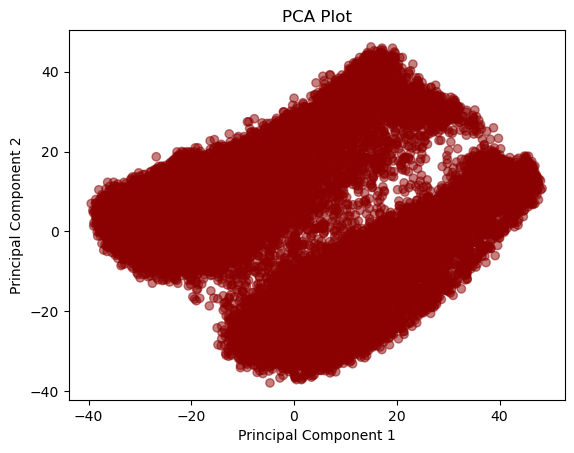

In [20]:
# Perform PCA
scaler = StandardScaler()
pca = PCA(n_components=20)
X_pca = pca.fit_transform(scaler.fit_transform(X))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Plot the data
color_map = {0: 'darkred', 1: 'red', 2: 'orange', 3: 'green'}
colors = [color_map[np.argmax(y)] for y in Y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()


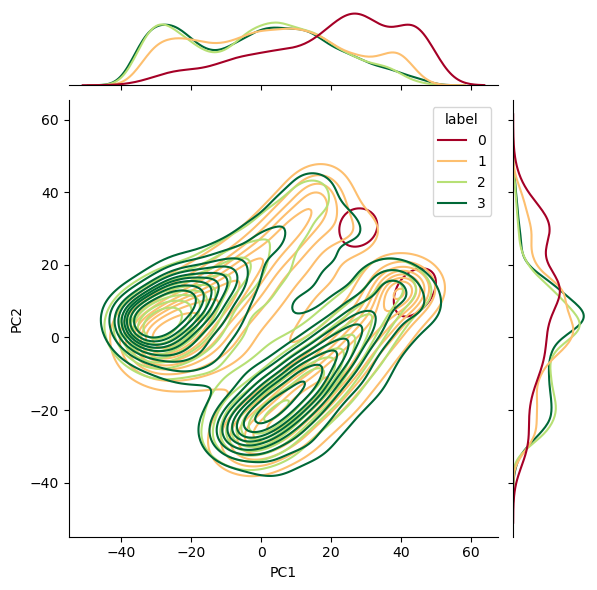

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'label': [np.argmax(y) for y in Y]})
sns.jointplot(data=df, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_dino_hpa.pt
X shape: torch.Size([31737, 1536])
Loading /data/ishang/FUCCI-dataset-well/minimal_sample_pseudotime.pt
Y shape: torch.Size([31737])


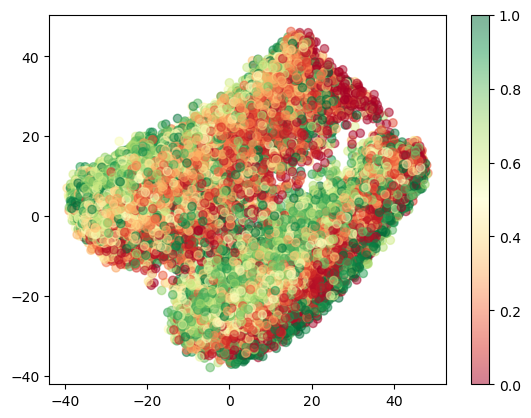

In [5]:
data_dir = Path("/data/ishang/FUCCI-dataset-well/")
ds = RefClsPseudo(data_dir, name, hpa=hpa, label="pseudotime")
X, Y = ds[:]
X, Y = X.numpy(), Y.numpy()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, alpha=0.5, cmap='RdYlGn')
plt.colorbar()

/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


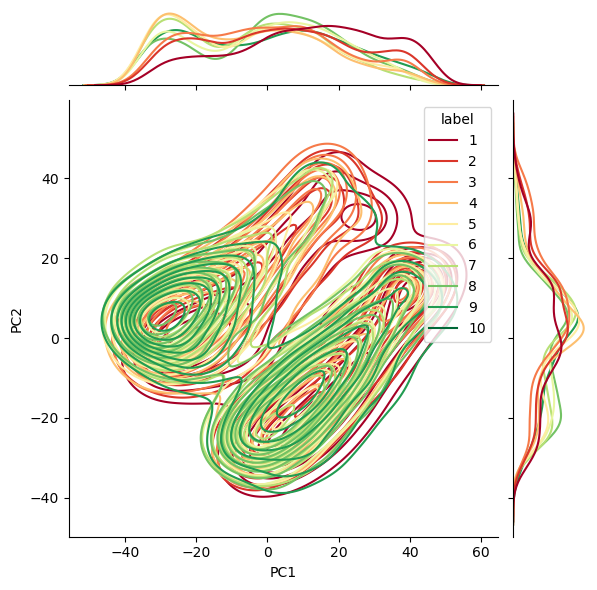

In [6]:
# Bucket the pseudotime into 10 bins
binned_Y = np.digitize(Y, bins=np.linspace(0, 1, 10))

# Create a new dataframe with binned pseudotime
df_binned = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'label': binned_Y})

# Create a jointplot
sns.jointplot(data=df_binned, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))


/tmp/ipykernel_545639/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'P

/tmp/ipykernel_545639/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)


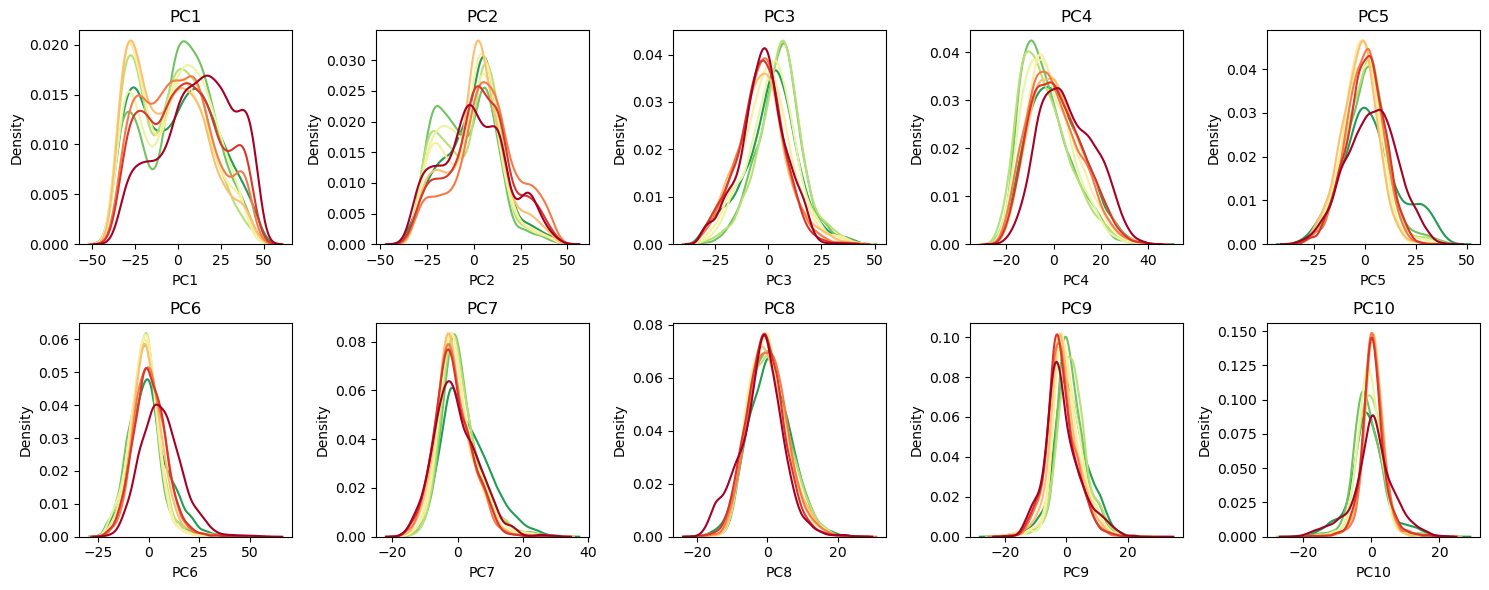

In [7]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

df_binned = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_binned['label'] = binned_Y

# Iterate over the PCs
for i in range(10):
    # Select the subplot
    ax = axes[i // 5, i % 5]
    
    # Create a KDE plot for the binned pseudotime of the current PC
    sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
    
    # Set the title of the subplot
    ax.set_title(f'PC{i+1}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


HPA vs FUCCI emebddings

In [8]:
from config import FUCCI_DS_PATH, HPA_DS_PATH
name = "minimal"
FUCCI_ds = RefClsPseudo(FUCCI_DS_PATH, name, hpa=True, label="pseudotime", scope=True, concat_well_stats=True)
FUCCI_X, FUCCI_Y = FUCCI_ds[:]
FUCCI_X, FUCCI_Y = FUCCI_X.numpy(), FUCCI_Y.numpy()
HPA_ds = RefClsPseudo(HPA_DS_PATH, name, hpa=True, inference=True, concat_well_stats=True)
HPA_X = HPA_ds[:]
HPA_X = HPA_X.numpy()

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_dino_hpa.pt
Loading /data/ishang/FUCCI-dataset-well/intensity_distributions_minimal.pt
X shape before intensity stats: torch.Size([31737, 1536])
X shape: torch.Size([31737, 2048])
Loading /data/ishang/FUCCI-dataset-well/minimal_sample_pseudotime.pt
Y shape: torch.Size([31737])
Loading /data/ishang/all_HPA-CC-dataset/embeddings_minimal_dino_hpa.pt
Loading /data/ishang/all_HPA-CC-dataset/intensity_distributions_minimal.pt
X shape before intensity stats: torch.Size([1870, 1536])
X shape: torch.Size([1870, 2048])


(31737, 2048)
2217
(1870, 2048)
134
[0.3088661  0.20023535 0.09329026 0.06890284 0.06177092 0.03937282
 0.02426932 0.02165397 0.0167063  0.01618159 0.01018972 0.00951187
 0.0092331  0.00789408 0.00713607 0.00638637 0.00613155 0.00574927
 0.00492319 0.00399702]
[0.3088661  0.50910145 0.6023917  0.67129457 0.7330655  0.7724383
 0.79670763 0.8183616  0.83506787 0.85124946 0.86143917 0.87095106
 0.8801842  0.8880783  0.8952143  0.90160066 0.9077322  0.9134815
 0.91840464 0.92240167]


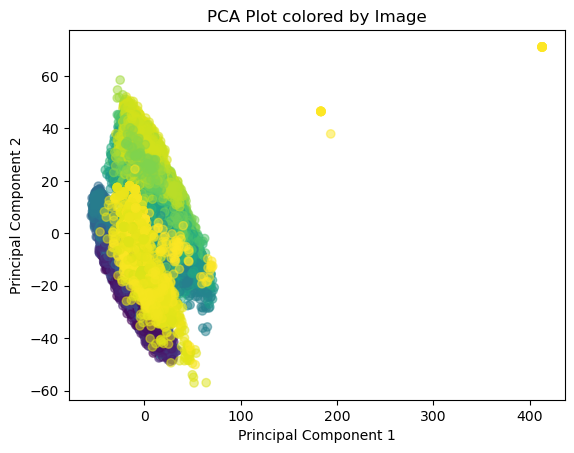

In [81]:
def get_img_labels(data):
    print(data.shape)
    well_label = 0
    img_labels = np.zeros((len(data),))
    uq_intensities = np.unique(data[:, 1536:], axis=0)
    # uq_intensities = np.unique(data[:, :1536], axis=0)
    for i in range(len(img_labels)):
        well_label = np.where(np.all(uq_intensities == data[i, 1536:], axis=1))[0][0]
        # well_label = np.where(np.all(uq_intensities == data[i, :1536], axis=1))[0][0]
        img_labels[i] = well_label
    print(len(np.unique(img_labels)))
    return img_labels, uq_intensities

fucci_img_labels, fucci_img_ints = get_img_labels(FUCCI_X)
hpa_img_labels, hpa_img_ints = get_img_labels(HPA_X)
img_labels = np.concatenate((fucci_img_labels, np.array(hpa_img_labels) + max(fucci_img_labels)))

hpa_len = len(HPA_X)
# FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 0 * hpa_len), np.random.choice(len(HPA_X), hpa_len)
# FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 1 * hpa_len), np.random.choice(len(HPA_X), hpa_len)
# FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 3 * hpa_len), np.random.choice(len(HPA_X), hpa_len)
FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 4 * hpa_len), np.random.choice(len(HPA_X), 0)
pca.fit(scaler.fit_transform(np.concatenate((FUCCI_X[FUCCI_sample], HPA_X[HPA_sample]))))
# pca.fit(scaler.fit_transform(np.concatenate((FUCCI_X[FUCCI_sample, :1536], HPA_X[HPA_sample, :1536]))))
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
X_pca = pca.transform(scaler.transform(np.concatenate((FUCCI_X, HPA_X))))
# X_pca = pca.transform(scaler.transform(np.concatenate((FUCCI_X, HPA_X))[:, :1536]))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=img_labels, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot colored by Image')
plt.show()

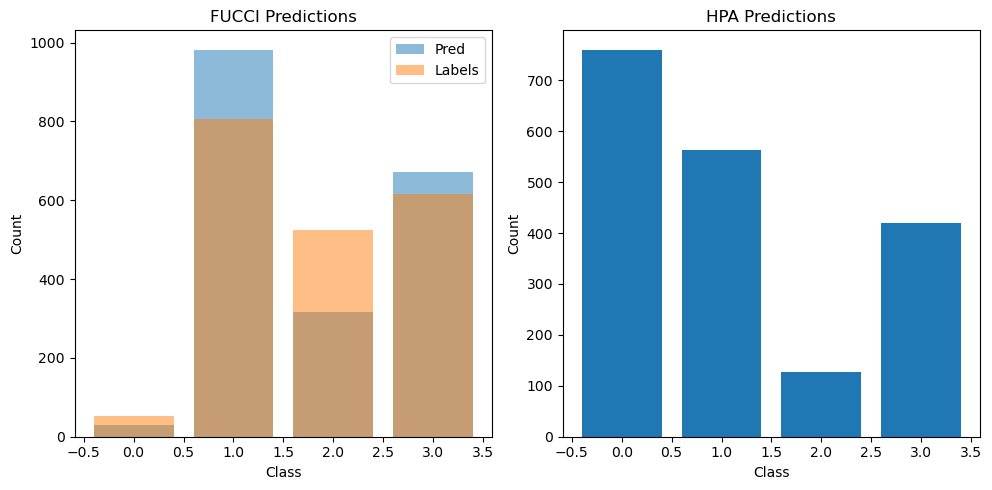

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import Counter
HPA_pca = X_pca[len(FUCCI_X):]
FUCCI_pca = X_pca[:len(FUCCI_X)]

model = KNeighborsClassifier(n_neighbors=30)
# model = LogisticRegression()
# model = SVC(kernel='poly', degree=4)
# model = SVC()
# model = RandomForestClassifier()

model.fit(FUCCI_pca[:-2000], Y_phase[:-2000])
HPA_Y_pred = model.predict(HPA_pca)
class_distribution = Counter(HPA_Y_pred)
FUCCI_distribution = Counter(model.predict(FUCCI_pca[-2000:]))
label_distribution = Counter(Y_phase[-2000:])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot FUCCI predictions
axs[0].bar(FUCCI_distribution.keys(), FUCCI_distribution.values(), alpha=0.5, label='Pred')
axs[0].bar(label_distribution.keys(), label_distribution.values(), alpha=0.5, label='Labels')
axs[0].legend()
axs[0].set_title('FUCCI Predictions')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# Plot HPA predictions
axs[1].bar(class_distribution.keys(), class_distribution.values())
axs[1].set_title('HPA Predictions')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

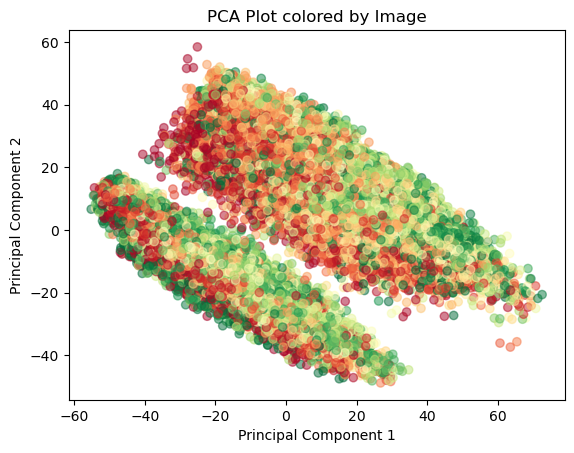

In [83]:
plt.scatter(X_pca[:len(fucci_img_labels), 0], X_pca[:len(fucci_img_labels), 1], c=FUCCI_Y, cmap="RdYlGn", alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot colored by Image')
plt.show()

/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x

/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_545639/2668483607.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x

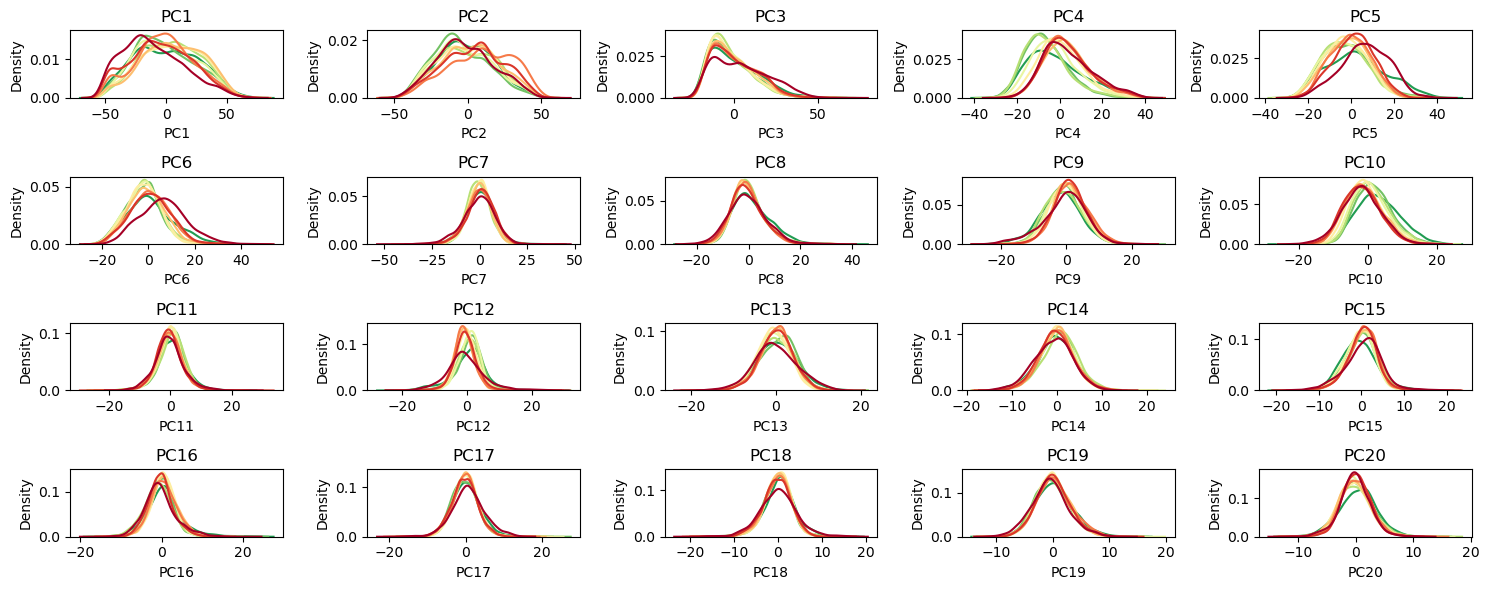

In [84]:
# Define the number of PCs you want to plot
num_pcs = X_pca.shape[1]  # This will plot all PCs. Change this value to plot a specific number of PCs.

# Create a grid of subplots
fig, axes = plt.subplots((num_pcs + 4) // 5, min(num_pcs, 5), figsize=(15, 6))

binned_Y = np.digitize(FUCCI_Y, bins=np.linspace(0, 1, 10))
df_binned = pd.DataFrame(X_pca[:len(fucci_img_labels)], columns=[f'PC{i+1}' for i in range(num_pcs)])
df_binned['label'] = binned_Y

# Iterate over the PCs
for i in range(num_pcs):
    # Select the subplot
    ax = axes[i // 5, i % 5]
    
    # Create a KDE plot for the binned pseudotime of the current PC
    sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
    
    # Set the title of the subplot
    ax.set_title(f'PC{i+1}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


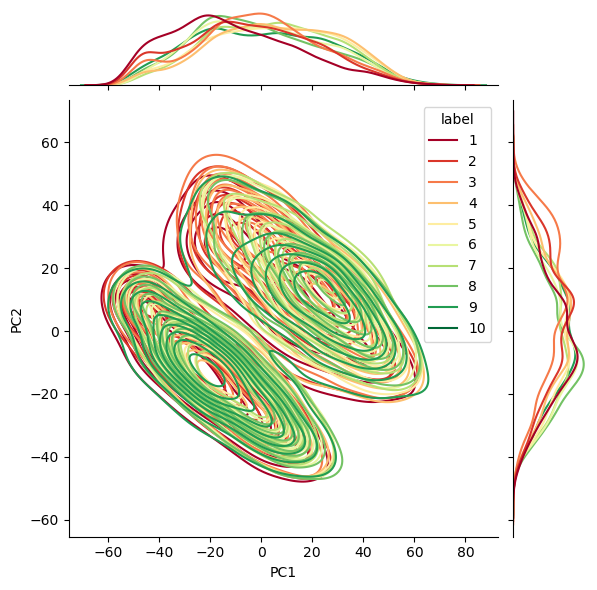

In [85]:
sns.jointplot(data=df_binned, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))


# Replicate issue using subsets of existing dataset

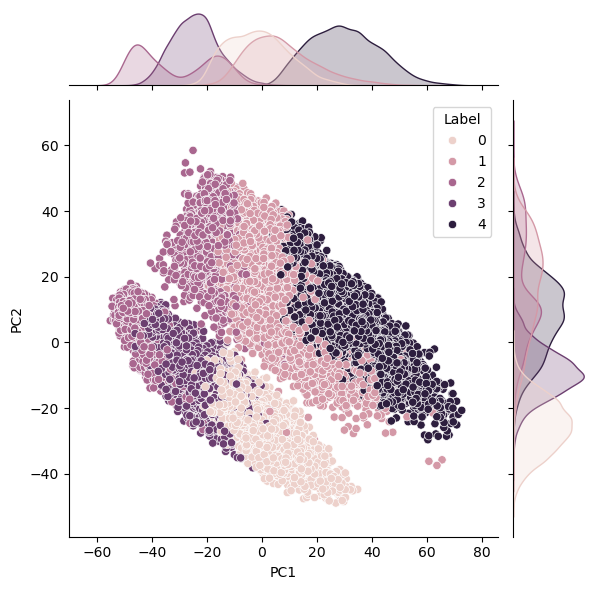

In [87]:
from sklearn.mixture import BayesianGaussianMixture
import pandas as pd
import seaborn as sns

# Bayesian Gaussian Mixture
bgm = BayesianGaussianMixture(n_components=5).fit(FUCCI_pca)
cluster_labels = bgm.predict(FUCCI_pca)

# Create a DataFrame with the PCs and labels
df = pd.DataFrame(FUCCI_pca, columns=[f'PC{i+1}' for i in range(FUCCI_pca.shape[1])])
df['Phase'] = Y_phase[:len(FUCCI_pca)]
df['Label'] = cluster_labels

# Create a jointplot using seaborn
sns.jointplot(data=df, x="PC1", y="PC2", hue="Label")


<Axes: xlabel='Phase', ylabel='Percentage'>

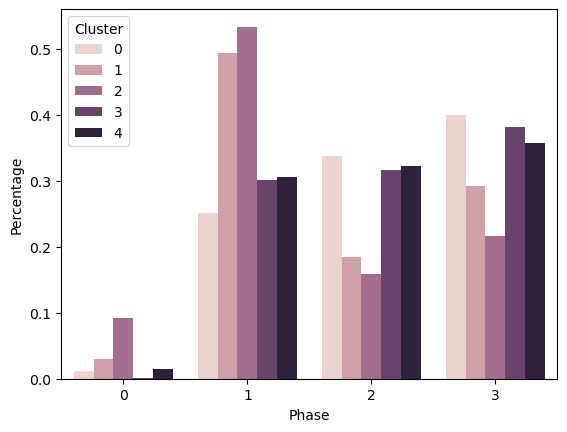

In [ ]:
from collections import Counter
df_dict = {"Phase": [], "Cluster": [], "Percentage": []}

# Get the counts of each phase for each cluster
for cluster in np.unique(cluster_labels):
    phase_counts = Counter(Y_phase[:len(FUCCI_X)][cluster_labels == cluster])
    total = sum(phase_counts.values())
    for phase, count in phase_counts.items():
        df_dict["Phase"].append(phase)
        df_dict["Cluster"].append(cluster)
        df_dict["Percentage"].append(count / total)

df = pd.DataFrame(df_dict)
sns.barplot(x='Phase', y='Percentage', hue='Cluster', data=df)


In [ ]:
from sklearn.mixture import BayesianGaussianMixture
import pandas as pd
import seaborn as sns

int_pca, int_scaler = PCA(n_components=2), StandardScaler()
INT_pca = int_pca.fit_transform(int_scaler.fit_transform(fucci_img_ints))

# Bayesian Gaussian Mixture
bgm = BayesianGaussianMixture(n_components=10).fit(INT_pca)
cluster_labels = bgm.predict(INT_pca)

# Create a DataFrame with the PCs and labels
df = pd.DataFrame(INT_pca, columns=[f'PC{i+1}' for i in range(FUCCI_pca.shape[1])])
df['label'] = cluster_labels

# Create a jointplot using seaborn
sns.jointplot(data=df, x="PC1", y="PC2", hue="label")